## Wavelgnth dependence of the BF Effect Using Galsim

Originally created by Alex Broughton


In [1]:
! eups list -s | grep lsst_distrib

eups                  LOCAL:/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2022_14/conda/envs/lsst-scipipe-3.0.0-ext/eups 	setup
lsst_distrib          g4eaec17cb9+23bdaa02ee 	w_latest w_2022_14 current setup


In [2]:
# Helper functions
N = 100

def calc2ndMom(results):
    # Calculate Second Moments
    e1 = results.observed_shape.e1
    e2 = results.observed_shape.e2
    sigma = results.moments_sigma
    sigma_ave = sigma / (1 - e1**2 - e2**2 )**(0.25) 
    Ixx = (1+e1) * sigma_ave**2
    Iyy = (1-e1) * sigma_ave**2
    Ixy = e2 * (sigma_ave**2) 
    
    return Ixx, Iyy, Ixy

#### Galaxy @ 680nm, Flux 10^3 - 10^6

In [3]:
import sys
import os
import math
import logging
import galsim
import numpy as np
import matplotlib.pyplot as plt

"""
About as simple as it gets:
  - Use a circular Gaussian profile for the galaxy.
  - Convolve it by a circular Gaussian PSF.
  - Add Gaussian noise to the image.
"""
gal_flux = 2.e5    # total counts on the image
gal_sigma = 0.2     # arcsec
pixel_scale = 0.2  # arcsec / pixel
noise = 30.        # standard deviation of the counts in each pixel


sensor = galsim.SiliconSensor(strength = 1.0, diffusion_factor=0.0, nrecalc=10000)
new_params = galsim.hsm.HSMParams(max_mom2_iter=500)
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")


# Define the galaxy profile
spectral_obj = galsim.Gaussian(flux=gal_flux, sigma=gal_sigma)*sed

obj_680 = spectral_obj.evaluateAtWavelength(680.0)

# Iterate over multpile fluxes
sigmas_680 = []
moments_xx_680 = []
fluxes_680 = []
peak_signal_680 = []
for n in np.linspace(1000,1000000, N):
    obj = obj_680.withFlux(n)

    # Draw the image with a particular pixel scale, given in arcsec/pixel.
    # The returned image has a member, added_flux, which is gives the total flux actually added to
    # the image.  One could use this value to check if the image is large enough for some desired
    # accuracy level.  Here, we just ignore it.
    image = obj.drawImage(scale=pixel_scale, method = "phot", sensor=sensor, save_photons=True)

    # Add Gaussian noise to the image with specified sigma
    #image.addNoise(galsim.GaussianNoise(sigma=noise))

    results = image.FindAdaptiveMom()
    Ixx, Iyy, Ixy = calc2ndMom(results)
    moments_xx_680.append(Ixx)
    peak_signal_680.append(np.max(np.ravel(image)))
    sigmas_680.append(results.moments_sigma)
    fluxes_680.append(results.moments_amp)

#### Galaxy @ 450nm, Flux 10^3 - 10^6

In [4]:
import sys
import os
import math
import logging
import galsim
import numpy as np
import matplotlib.pyplot as plt

"""
About as simple as it gets:
  - Use a circular Gaussian profile for the galaxy.
  - Convolve it by a circular Gaussian PSF.
  - Add Gaussian noise to the image.
"""
gal_flux = 2.e5    # total counts on the image
gal_sigma = 0.2     # arcsec
psf_sigma = 0.01     # arcsec
pixel_scale = 0.2  # arcsec / pixel
noise = 30.        # standard deviation of the counts in each pixel


#sensor = galsim.SiliconSensor(strength = 1.0, diffusion_factor=1, nrecalc=10000)
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")


# Define the galaxy profile
spectral_obj = galsim.Gaussian(flux=gal_flux, sigma=gal_sigma)*sed

obj_450 = spectral_obj.evaluateAtWavelength(450.0)


sigmas_450 = []
moments_xx_450 = []
fluxes_450 = []
peak_signal_450 = []
for n in np.linspace(1000,1000000, N):
    obj = obj_450.withFlux(n)

    # Draw the image with a particular pixel scale, given in arcsec/pixel.
    # The returned image has a member, added_flux, which is gives the total flux actually added to
    # the image.  One could use this value to check if the image is large enough for some desired
    # accuracy level.  Here, we just ignore it.
    image = obj.drawImage(scale=pixel_scale, method = "phot", sensor=sensor, save_photons=True)

    # Add Gaussian noise to the image with specified sigma
    #image.addNoise(galsim.GaussianNoise(sigma=noise))

    results = image.FindAdaptiveMom()
    Ixx, Iyy, Ixy = calc2ndMom(results)
    moments_xx_450.append(Ixx)
    peak_signal_450.append(np.max(np.ravel(image)))
    sigmas_450.append(results.moments_sigma)
    fluxes_450.append(results.moments_amp)


#### Galaxy @ 1050nm, Flux 10^3 - 10^6

In [5]:
import sys
import os
import math
import logging
import galsim
import numpy as np
import matplotlib.pyplot as plt

"""
About as simple as it gets:
  - Use a circular Gaussian profile for the galaxy.
  - Convolve it by a circular Gaussian PSF.
  - Add Gaussian noise to the image.
"""
gal_flux = 2.e5    # total counts on the image
gal_sigma = 0.2     # arcsec
psf_sigma = 0.01     # arcsec
pixel_scale = 0.2  # arcsec / pixel
noise = 30.        # standard deviation of the counts in each pixel


#sensor = galsim.SiliconSensor(strength = 1.0, diffusion_factor=1, nrecalc=10000)
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")


# Define the galaxy profile
spectral_obj = galsim.Gaussian(flux=gal_flux, sigma=gal_sigma)*sed

obj_1050 = spectral_obj.evaluateAtWavelength(1050.0)


sigmas_1050 = []
moments_xx_1050 = []
fluxes_1050 = []
peak_signal_1050 = []
for n in np.linspace(1000,1000000, N):
    obj = obj_1050.withFlux(n)

    # Draw the image with a particular pixel scale, given in arcsec/pixel.
    # The returned image has a member, added_flux, which is gives the total flux actually added to
    # the image.  One could use this value to check if the image is large enough for some desired
    # accuracy level.  Here, we just ignore it.
    image = obj.drawImage(scale=pixel_scale, method = "phot", sensor=sensor, save_photons=True)

    # Add Gaussian noise to the image with specified sigma
    #image.addNoise(galsim.GaussianNoise(sigma=noise))

    results = image.FindAdaptiveMom(hsmparams=new_params)
    Ixx, Iyy, Ixy = calc2ndMom(results)
    moments_xx_1050.append(Ixx)
    peak_signal_1050.append(np.max(np.ravel(image)))
    sigmas_1050.append(results.moments_sigma)
    fluxes_1050.append(results.moments_amp)



#### Galaxy @ 365nm, Flux 10^3 - 10^6

In [6]:
import sys
import os
import math
import logging
import galsim
import numpy as np
import matplotlib.pyplot as plt

"""
About as simple as it gets:
  - Use a circular Gaussian profile for the galaxy.
  - Convolve it by a circular Gaussian PSF.
  - Add Gaussian noise to the image.
"""
gal_flux = 2.e5    # total counts on the image
gal_sigma = 0.2     # arcsec
psf_sigma = 0.01     # arcsec
pixel_scale = 0.2  # arcsec / pixel
noise = 30.        # standard deviation of the counts in each pixel


#sensor = galsim.SiliconSensor(strength = 1.0, diffusion_factor=1, nrecalc=10000)
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")


# Define the galaxy profile
spectral_obj = galsim.Gaussian(flux=gal_flux, sigma=gal_sigma)*sed

obj_365 = spectral_obj.evaluateAtWavelength(365.0)


sigmas_365 = []
moments_xx_365 = []
fluxes_365 = []
peak_signal_365 = []
for n in np.linspace(1000,1000000, N):
    obj = obj_365.withFlux(n)
    
    # Draw the image with a particular pixel scale, given in arcsec/pixel.
    # The returned image has a member, added_flux, which is gives the total flux actually added to
    # the image.  One could use this value to check if the image is large enough for some desired
    # accuracy level.  Here, we just ignore it.
    image = obj.drawImage(scale=pixel_scale, method = "phot", sensor=sensor, save_photons=True)

    # Add Gaussian noise to the image with specified sigma
    image.addNoise(galsim.GaussianNoise(sigma=noise))

    results = image.FindAdaptiveMom(hsmparams=new_params)
    Ixx, Iyy, Ixy = calc2ndMom(results)
    moments_xx_365.append(Ixx)
    peak_signal_365.append(np.max(np.ravel(image)))
    sigmas_365.append(results.moments_sigma)
    fluxes_365.append(results.moments_amp)


### Plot it (BF Only)

[3.30045353e-08 1.08676294e+00]


Text(0, 0.5, 'Ixx')

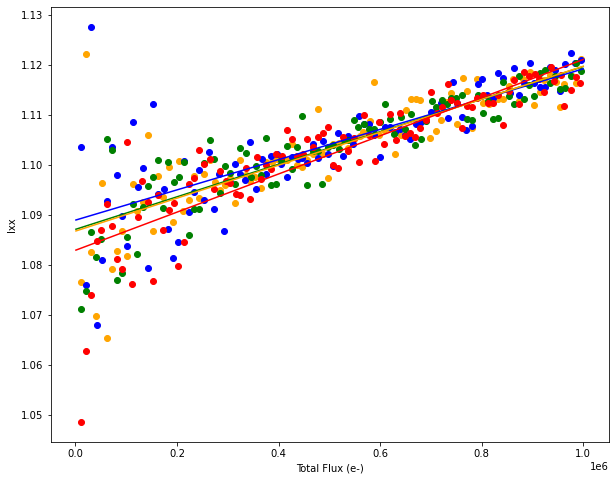

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(fluxes_680[1:-1], moments_xx_680[1:-1], color="orange")
plt.scatter(fluxes_365[1:-1], moments_xx_365[1:-1], color ="b")
plt.scatter(fluxes_450[1:-1], moments_xx_450[1:-1], color ="g")
plt.scatter(fluxes_1050[1:-1], moments_xx_1050[1:-1], color="r")

p, residuals, rank, singular_values, rcond = np.polyfit(fluxes_680[1:-1],moments_xx_680[1:-1],deg=1, full=True)
m_680,b_680 = p[0],p[1]
m_365,b_365 = np.polyfit(fluxes_365[1:-1],moments_xx_365[1:-1],deg=1)
m_450,b_450 = np.polyfit(fluxes_450[1:-1],moments_xx_450[1:-1],deg=1)
m_1050,b_1050 = np.polyfit(fluxes_1050[1:-1],moments_xx_1050[1:-1],deg=1)
plt.plot(np.linspace(1000,1000000,20), m_365 * np.linspace(1000,1000000,20) + b_365, "b", label="365nm")
plt.plot(np.linspace(1000,1000000,20), m_450 * np.linspace(1000,1000000,20) + b_450, "g", label="450nm")
plt.plot(np.linspace(1000,1000000,20), m_680 * np.linspace(1000,1000000,20) + b_680, "orange", label="680nm")
plt.plot(np.linspace(1000,1000000,20), m_1050 * np.linspace(1000,1000000,20) + b_1050, "r", label="1050nm")

plt.xlabel("Total Flux (e-)")
plt.ylabel("Ixx")

Text(0.5, 0, 'Wavelength, nm')

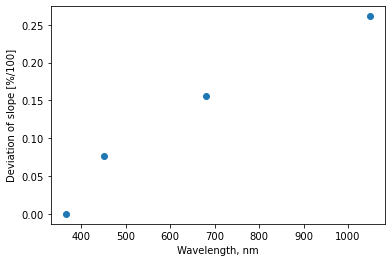

In [8]:
plt.scatter([365,450,680,1050],[(m_365-m_365)/m_365,(m_450-m_365)/m_365,(m_680-m_365)/m_365,(m_1050-m_365)/m_365])
plt.ylabel("Deviation of slope [%/100]")
plt.xlabel("Wavelength, nm")

Compared to Lab Data:

In [10]:
import sys
import os
import math
import logging
import galsim
import numpy as np
import matplotlib.pyplot as plt

"""
About as simple as it gets:
  - Use a circular Gaussian profile for the galaxy.
  - Convolve it by a circular Gaussian PSF.
  - Add Gaussian noise to the image.
"""
gal_flux = 2.e5    # total counts on the image
gal_sigma = 0.2     # arcsec
pixel_scale = 0.2  # arcsec / pixel
noise = 30.        # standard deviation of the counts in each pixel


sensor = galsim.SiliconSensor(strength = 1.0, diffusion_factor=0.0, nrecalc=10000)
new_params = galsim.hsm.HSMParams(max_mom2_iter=500)
sed = galsim.SED('wave**1.0',wave_type="nm", flux_type="1")


# Define the galaxy profile
spectral_obj = galsim.Gaussian(flux=gal_flux, sigma=gal_sigma)*sed

obj_680 = spectral_obj.evaluateAtWavelength(680.0)

# Iterate over multpile fluxes
sigmas_680 = []
moments_xx_680 = []
fluxes_680 = []
peak_signal_680 = []
for n in np.linspace(1000,1000000, N):
    obj = obj_680.withFlux(n)

    # Draw the image with a particular pixel scale, given in arcsec/pixel.
    # The returned image has a member, added_flux, which is gives the total flux actually added to
    # the image.  One could use this value to check if the image is large enough for some desired
    # accuracy level.  Here, we just ignore it.
    image = obj.drawImage(scale=pixel_scale, method = "phot", sensor=sensor, save_photons=True)

    # Add Gaussian noise to the image with specified sigma
    #image.addNoise(galsim.GaussianNoise(sigma=noise))

    results = image.FindAdaptiveMom()
    Ixx, Iyy, Ixy = calc2ndMom(results)
    moments_xx_680.append(Ixx)
    peak_signal_680.append(np.max(np.ravel(image.array)))
    sigmas_680.append(results.moments_sigma)
    fluxes_680.append(results.moments_amp)

In [11]:
m_680,b_680 = np.polyfit(fluxes_680[1:-1],moments_xx_680[1:-1],deg=1)
print(m_680 * 1.0e4)

0.0003300453530477293
